<a href="https://colab.research.google.com/github/bye23mj/suanLee/blob/main/_10_%EA%B5%B0%EC%A7%91%ED%99%94(Clustering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집화(Clustering)

* 대표적인 비지도학습 알고리즘
* 레이블이 없는 데이터를 그룹화 하는 알고리즘

[참고 : https://velog.io/@ljs7463/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81 ]

## 목적
* 주어진 데이터들이 얼마나 어떻게 유사한지
* 주어진 데이터셋을 요약, 정리하는데 매우 효율적인 방법 중 하나.
* but, 정답을 보장하지 않기 때문에 예측을 위한 모델링 보다는 EDA를 위해 많이 사용된다.
* 또한 클러스터링은 비지도 학습 알고리즘의 하나인 군집화의 기능적 의미는 숨어있는 새로운 집단을 발견하는 것입니다. 새로운 군집 내의 데이터 값을 분석하고 이해함으로서 이 집단에 새로운 의미를 부여할 수 있고 전체 데이터를 다각도로 살펴볼 수 있다.

### Similarity(거리, 유사도)
1. Euclidean(유클리디안 거리) : 가장 흔하게 사용되는 거리 척도로 빛이 가는 거리로 정의
2. 맨하탄 거리 : 정수형 데이터(예:리커트 척도(설문조사))에 적합한 거리척도 / 수직, 수평으로만 이동한 거리의 합으로 정의됨.
3. 코사인 유사도 : 스케일을 고려하지 않고 방향 유사도를 측정하는 상황(예 : 상품 추천)에 주로 사용.
4. 매칭 유사도 : 이진형 데이터에 적합한 유사도 척도로 전체 특징 중 일치하는 비율을 고려함.
5. 자카드 유사도 : 이진형 데이터에 적합한 유사도 척도로 둘 중 하나라도 1을 가지는 특징 중 일치하는 비율을 고려함

### 계층군집(Hierarchical) / AgglomerativeClustering
* 장점
1. 덴드로그램을 이용한 군집화 과정 확인 가능(데이터가 크지않을때) 
2. 거리/유사도 행렬만 있으면 군집화 가능 
3. 다양한 거리 척도 활용가능 
4. 수행할 때 마다 같은 결과를 냄(임의성 존재x)
* 단점
1. 상대적으로 많은 계산량 -> 상대적으로 데이터 크기가 작은 문제에 적용된다.
2.군집개수 설정에 대한 제약 존재

### K-means 군집화 / KMeans, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering
* 장점
1. 상대적으로 적은 계산량, 
2. 군집 개수 설정에 제약이 없고 쉬움, 
3. k평균알고리즘은 각 유형을 나눌때 사용한 k개의 중심점이 곧 해당 유형의 대표값이기 때문에 각 유형의 특징을 파악하기 쉽다.
* 단점
1. 초기 중심설정에 따른 수행할때마다 다른결과를 낼 가능성 존재(임의성 존재ㅇ)
2. 데이터 분포가 특이하거나 군집별 밀도 차이가 존재하면 좋은 성능을 내기 어려움
3. 유클리디안 거리만 사용해야함(중심점이 있기때문) 
4. 수렴하지 않을 가능성 존재 
5. 속성개수가 많으면 군집화 정확도가 떨어진다. 
6. 반복횟수가 많으면 속도가 매우 느려진다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

from sklearn import cluster
from sklearn import mixture
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

## 데이터 생성

In [ ]:
def plot_data(dataset, postion, title):
  X,y = dataset
  plt.subplot(postion)
  plt.title(title)
  plt.scatter(X[:, 0], X[:, 1])

In [ ]:
np.random.seed(0)
n_samples = 1500
random_state = 0
noise = 0.05

In [ ]:
circles = datasets.make_circles(n_samples=n_samples, noise=noise, random_state=random_state, factor=0.05)
moon = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
no_structures = np.random.rand(n_samples,2), None

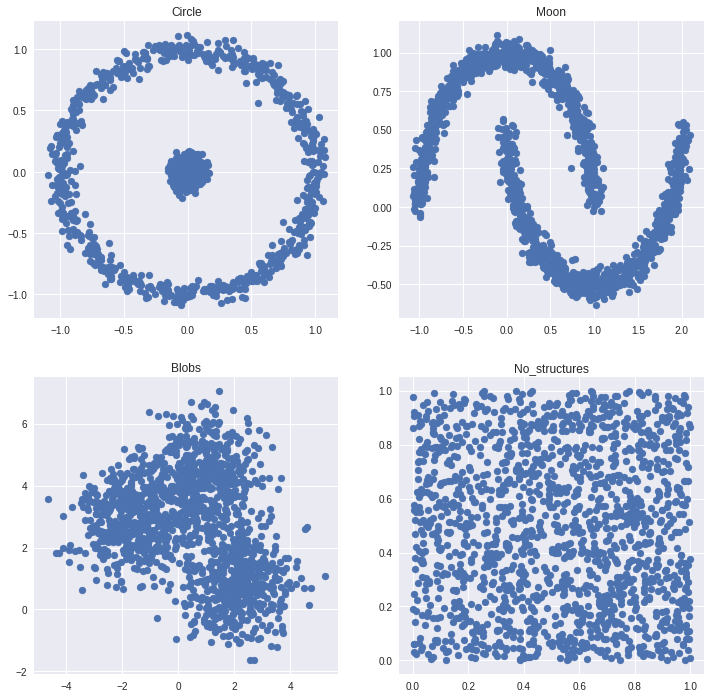

In [ ]:
plt.figure(figsize=(12,12))
plot_data(circles, 221, 'Circle')
plot_data(moon, 222, 'Moon')
plot_data(blobs, 223, 'Blobs')
plot_data(no_structures, 224, 'No_structures')

In [ ]:
def fit_predict_plot(model, dataset, position, title):
  X,y = dataset
  model.fit(X)
  # hasattr : object의 속성(attribute) 존재를 확인한다.
  if hasattr(model, 'labels_'):
    labels = model.labels_.astype(np.int)
    print('labels_')
  else:
    labels = model.predict(X)
    print('predict')

  colors = np.array(['#30A9DE', '#E53A40', '#090707', '#A593E0', '#F6B352', '#519D9E', '#D81159', '#8CD790', '#353866'])
  ax = plt.subplot(position)
  ax.set_title(title)
  ax.scatter(X[:, 0], X[:, 1], color=colors[labels])

## K-평균 (K-Means)

* n개의 등분산 그룹으로 군집화
* 제곱합 함수를 최소화
* 군집화 개수를 지정해야 한다.
* 각 군집 $C$의 평균 $\mu_j$을 중심점 이라고 함
* 다음을 만족하는 중심점을 찾는것이 목표

\begin{equation}
\sum_{i=0}^{n} \underset{\mu_j \in C}{\min} (||x_i - \mu_j||^2)
\end{equation}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


labels_


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


labels_


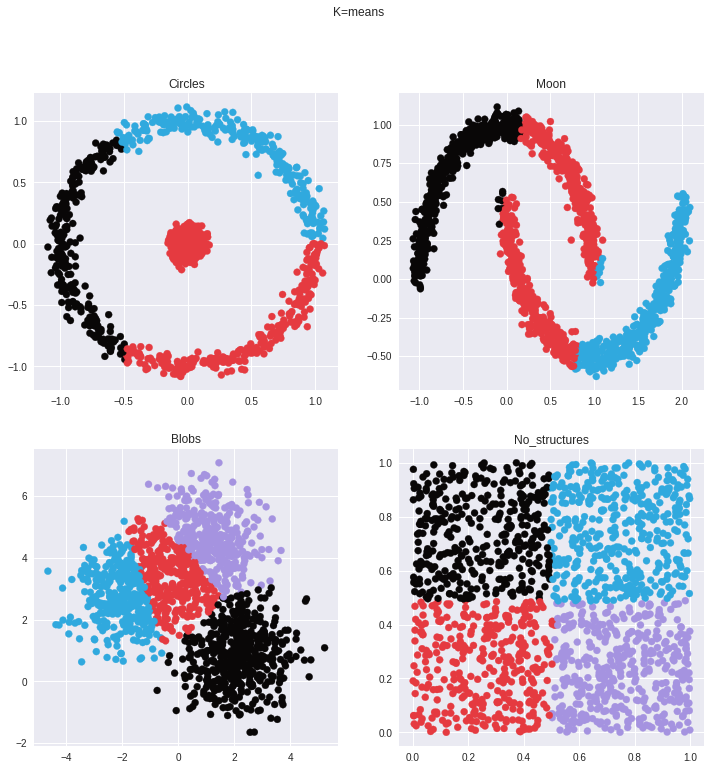

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('K=means')

fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.KMeans(n_clusters=3, random_state=random_state), moon, 222, 'Moon')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.KMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No_structures')

### 붓꽃 데이터 군집화
* K-Means 알고리즘을 사용해 붓꽃 데이터를 군집화 해본다.
* 같은 종류의 붓꽃끼리 잘 군집화가 되었다.

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

In [ ]:
model = cluster.KMeans(n_clusters=3)
model.fit(iris.data)
predict = model.predict(iris.data)

In [ ]:
idx = np.where(predict == 0)
iris.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
idx = np.where(predict == 1)
iris.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [ ]:
idx = np.where(predict == 2)
iris.target[idx]

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 미니 배치 K-평균 (Mini Batch K-Means)

* 배치 처리를 통해 계산 시간을 줄인 K-평균
* K-평균과 다른 결과가 나올 수 있다.

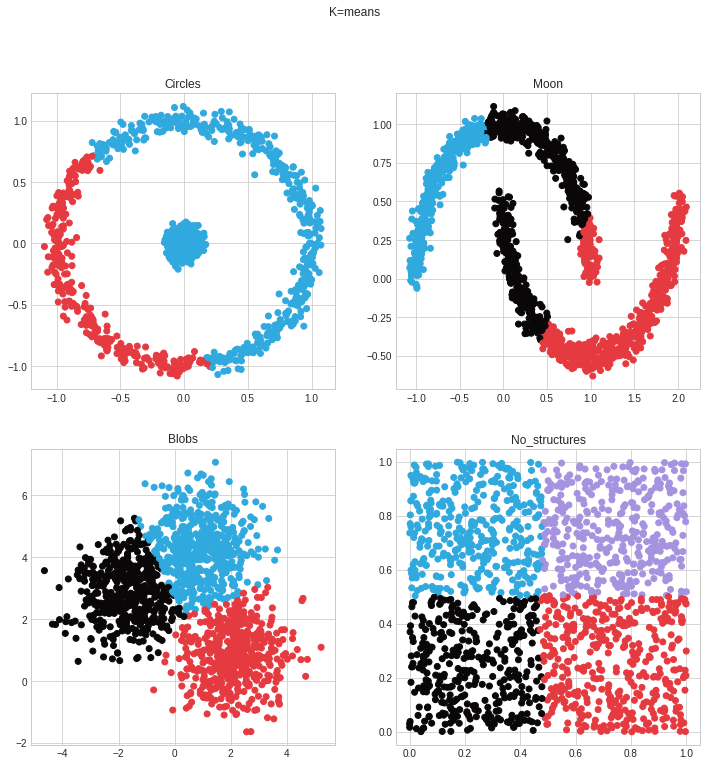

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('MiniBatchKMeans')

fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), moon, 222, 'Moon')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=3, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MiniBatchKMeans(n_clusters=4, random_state=random_state), no_structures, 224, 'No_structures')

## Affinity Propagation(선호도 전파)

* 샘플 쌍 끼리 메시지를 보내 군집을 생성
* 샘플을 대표하는 적절한 예를 찾을 때까지 반복
* 군집의 갯수를 자동으로 정함

![affinity propagation](https://scikit-learn.org/stable/_images/sphx_glr_plot_affinity_propagation_0011.png)

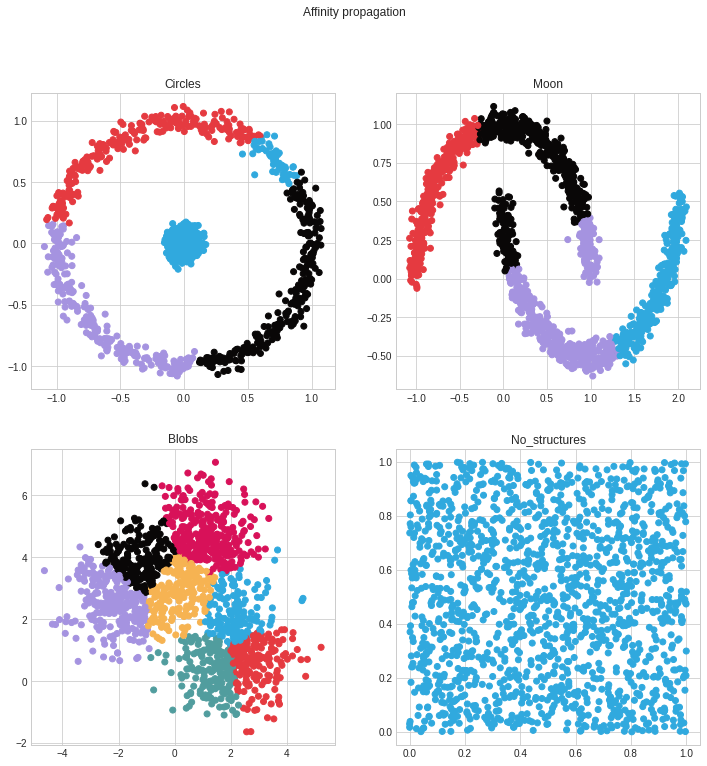

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity propagation')

fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), circles, 221, 'Circles')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), moon, 222, 'Moon')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AffinityPropagation(damping=0.9, preference=-200), no_structures, 224, 'No_structures')

## Mean Shift

* 중심점 후보를 정해진 구역 내 평균으로 업데이트

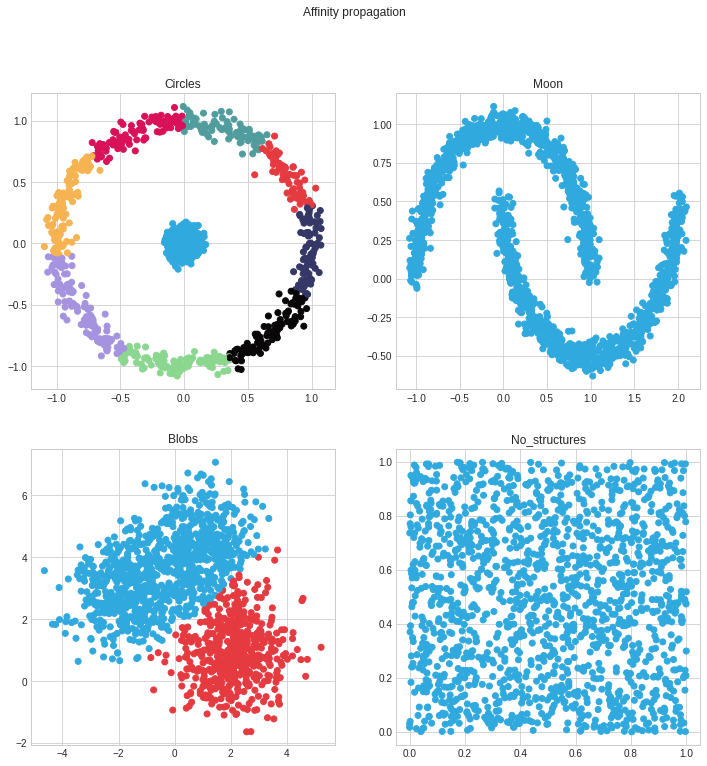

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Affinity propagation')

fit_predict_plot(cluster.MeanShift(), circles, 221, 'Circles')
fit_predict_plot(cluster.MeanShift(), moon, 222, 'Moon')
fit_predict_plot(cluster.MeanShift(), blobs, 223, 'Blobs')
fit_predict_plot(cluster.MeanShift(), no_structures, 224, 'No_structures')

## 스펙트럼 군집화 (Spectral Clustering)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

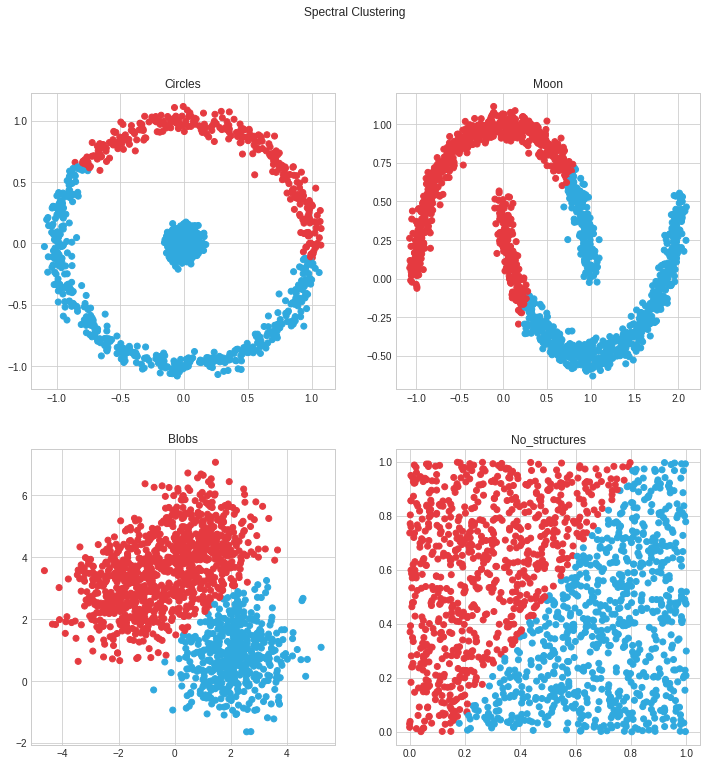

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Spectral Clustering')

fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), circles, 221, 'Circles')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), moon, 222, 'Moon')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), blobs, 223, 'Blobs')
fit_predict_plot(cluster.SpectralClustering(n_clusters=2, random_state=random_state), no_structures, 224, 'No_structures')

### 유방암 데이터 군집화

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
model= cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
model.fit(cancer.data)
predict = model.labels_

In [ ]:
idx = np.where(predict == 0)
cancer.target[idx]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
idx = np.where(predict == 1)
cancer.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

## 계층 군집화 (Hierarchical Clustering)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

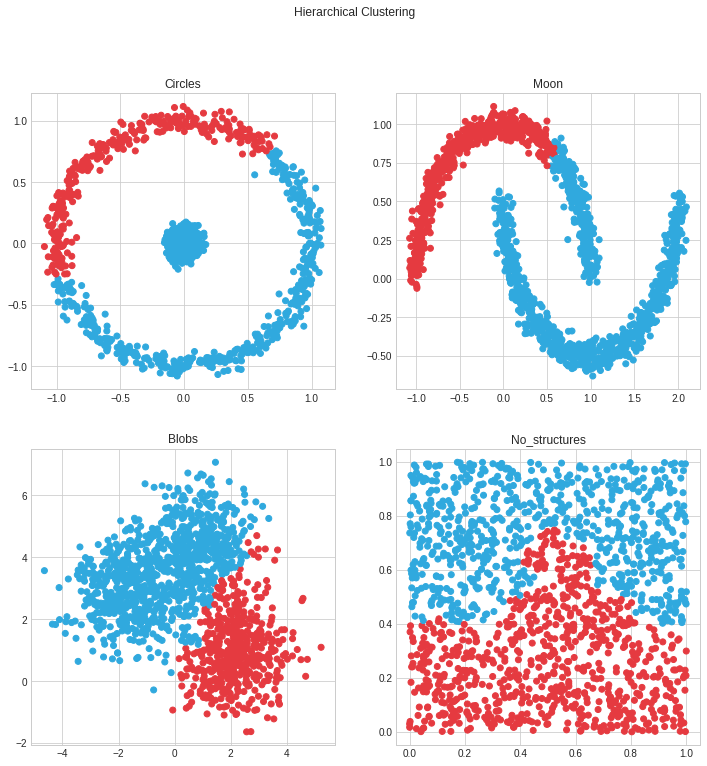

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Hierarchical Clustering')

fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), circles, 221, 'Circles')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), moon, 222, 'Moon')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), blobs, 223, 'Blobs')
fit_predict_plot(cluster.AgglomerativeClustering(n_clusters=2, linkage='ward'), no_structures, 224, 'No_structures')

### 와인 데이터 군집화

In [ ]:
from sklearn.datasets import load_wine

In [ ]:
wine = load_wine()

In [ ]:
model = cluster.AgglomerativeClustering(n_clusters=3)
model.fit(wine.data)
predict = model.labels_

In [ ]:
idx = np.where(predict==0)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [ ]:
idx = np.where(predict==1)
wine.target[idx]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [ ]:
idx = np.where(predict==2)
wine.target[idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

* 밀도 기반 군집화의 대표적 예
* 간단하고 직관적인 알고리즘으로 되어 있음에도 데이터의 분포가 기하학적으로 잡한 데이터 세트에도 효과적인 군집화가 가능 
* 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다. 
* 아래의 복잡한 군집화도 가능!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

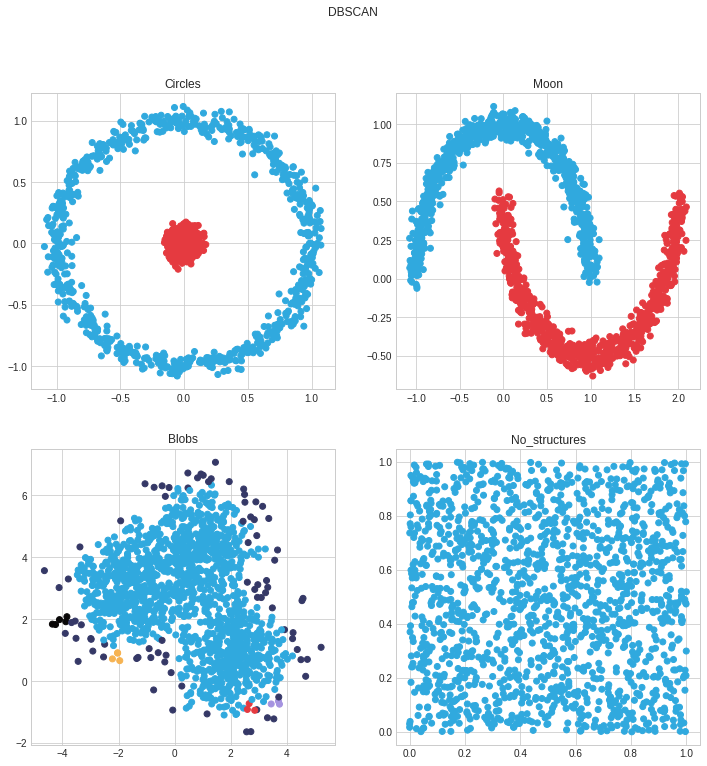

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('DBSCAN ')

fit_predict_plot(cluster.DBSCAN(eps=0.3), circles, 221, 'Circles')
fit_predict_plot(cluster.DBSCAN(eps=0.3), moon, 222, 'Moon')
fit_predict_plot(cluster.DBSCAN(eps=0.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.DBSCAN(eps=0.3), no_structures, 224, 'No_structures')

## OPTICS (Ordering Points To Identify the Clustering Structure)
* 밀도 기반의 클러스터를 탐색하기 위한 알고리즘
* DBSCAN과 유사하지만, 다양한 밀도를 가진 데이터에서 클러스터를 잘 찾아내지 못하는 문제를 해결하기 위해 고안
* 데이터들을 정렬하여 가까운 point들이 이웃이 될 수 있도록 하며, 각 point가 더 밀집된 cluster에 포함될 수 있도록 한다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

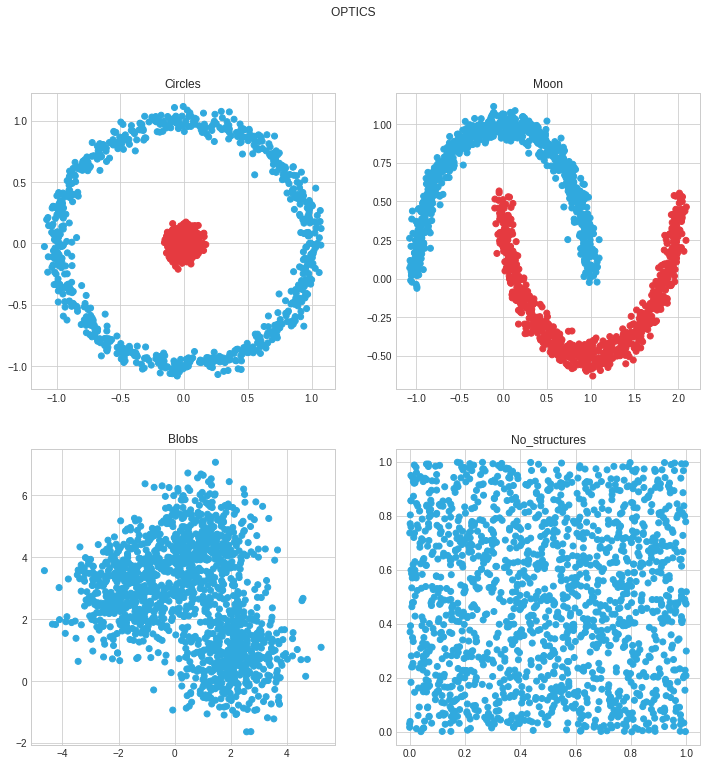

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('OPTICS ')

fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), circles, 221, 'Circles')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), moon, 222, 'Moon')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), blobs, 223, 'Blobs')
fit_predict_plot(cluster.OPTICS(min_samples=20, xi=0.05, min_cluster_size=0.1), no_structures, 224, 'No_structures')

## Birch (Balanced iterative reducing and clustering using hierarchies)
* 클러스터 센터로이드들을 뽑아내서 나무 구조를 만든다.입력되는 다차원 메트릭 데이터 포인트를 점증적이고 역동적으로 군집화해서 사용 가능한 자원( 메모리, 시간 제약)을 가지고 최고 품질의 군집화를 달성한다.\

[참고 : http://nodejs-style.selfhow.com/post/?id=5596 ]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depreca

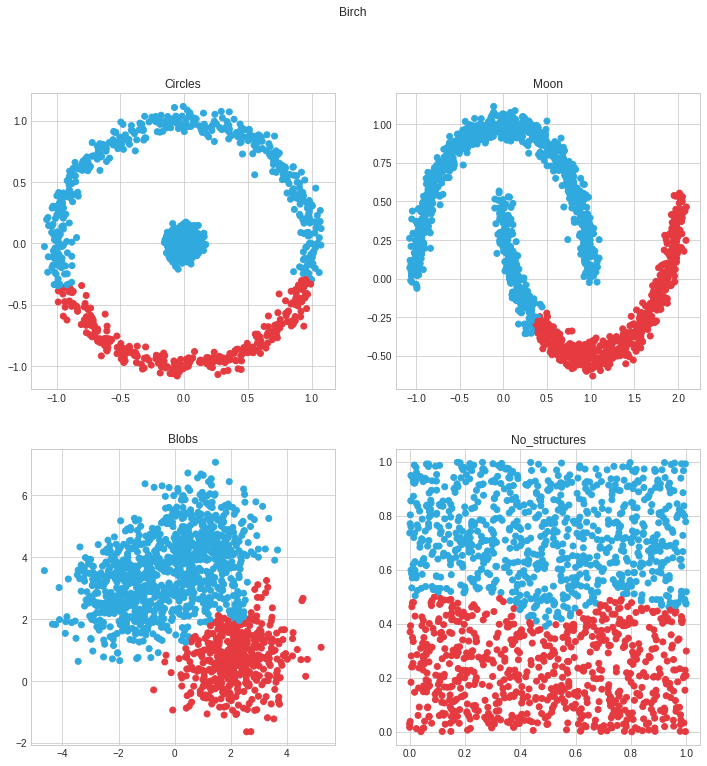

In [ ]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Birch ')

fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), circles, 221, 'Circles')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), moon, 222, 'Moon')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), blobs, 223, 'Blobs')
fit_predict_plot(cluster.Birch(n_clusters=2, threshold=.3), no_structures, 224, 'No_structures')

## 손글씨 데이터 군집화

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
X = digits.data.reshape(-1,8,8)
y = digits.target

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


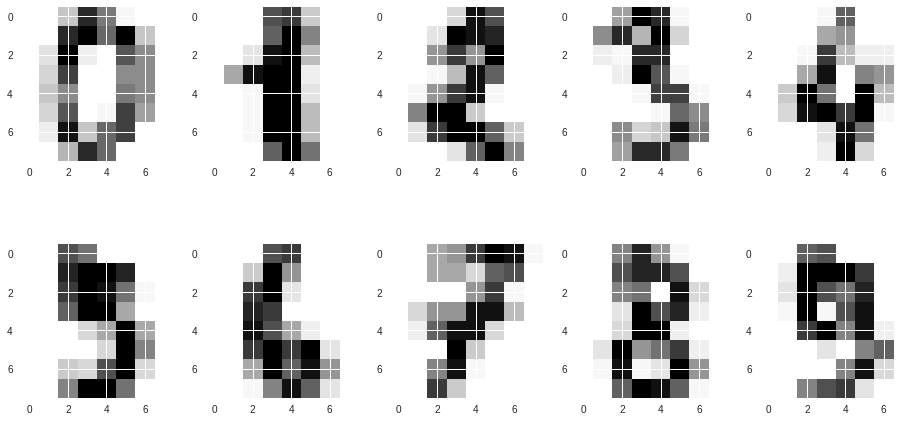

In [ ]:
plt.style.use(['seaborn-notebook'])

plt.figure(figsize=(16,8))

for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(X[i])

print(y[0:20])

### K-Means

In [ ]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(digits.data)
predict = kmeans.predict(digits.data)

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 8 8 5 5 5 8 5 1 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 8 5 5 5 9 9 5 5 5 5 5 5 5 9 9 5 5 3 5 5 5 5 5 3
 5]
Cluster 2:[3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 9 3 3 3 3 3 3 3 2 3 3 3 3 8
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 2 2 2 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 9 3 2 3 3 2 2 3 3 3 3 3 9 2 9 3 8 3 3 3 3]
Cluster 3:[1 1 7 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 9 9 1 1 1 1 1 1 1
 1 4 1 1 1 1 4 8 9 9 4 9 9 9 9 7 9 9 9 9 9 9 9 8 8 8 8 1 1 1 1 1 1 1 1 1 1
 1 8 1 1 1 1 1 1 1 1 6 9 9 9 9 9 4]
Cluster 4:[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 1 8 

Cluster:1


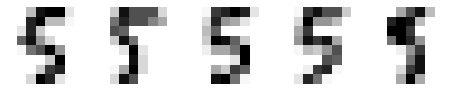

Cluster:2


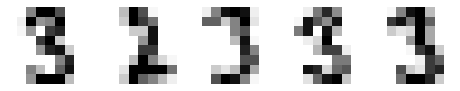

Cluster:3


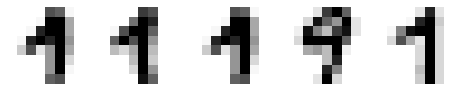

Cluster:4


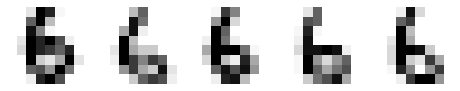

Cluster:5


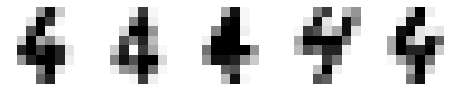

Cluster:6


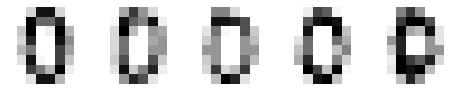

Cluster:7


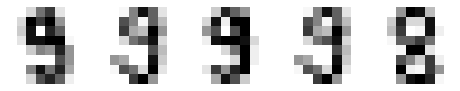

Cluster:8


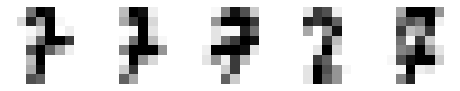

Cluster:9


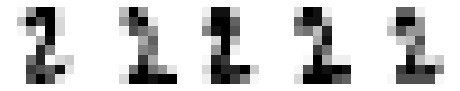

Cluster:10


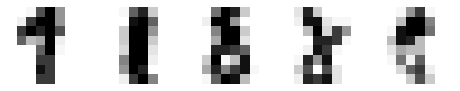

In [ ]:
for i in range(10):

  idx = np.where(predict ==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster:{}'.format(i+1))

  for image in choice_image:
    plt.subplot(1,5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k+=1

  plt.show()    

### Spectral Clustering

In [ ]:
digits = load_digits()

spectral = cluster.SpectralClustering(n_clusters=10, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(digits.data)
predict = spectral.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 8 3 3 9 3 9 3
 9 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 8 3 3 9 8 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3
 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 5 9 9 9 9 3 5 3 3 3 3 9 9 3 3 3 9
 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9
 9 9 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3
 9 3 3 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3
 3 3 3 3 9 9 3 9 3 9 3 9 9 9 9 3 3 9 9 3 3 3 9 3 9 9 9 9]
Cluster 2:[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4

Cluster:1


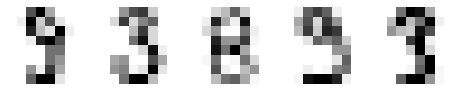

Cluster:2


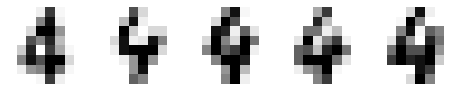

Cluster:3


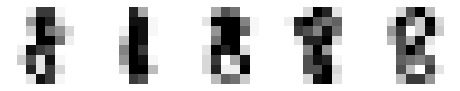

Cluster:4


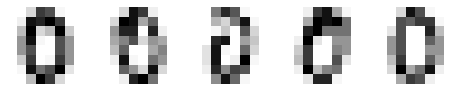

Cluster:5


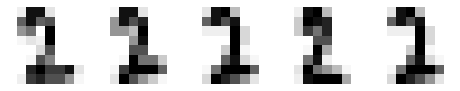

Cluster:6


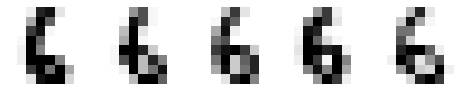

Cluster:7


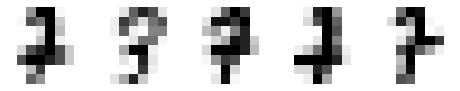

Cluster:8


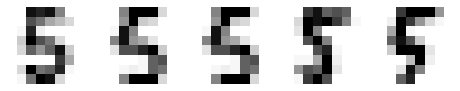

Cluster:9


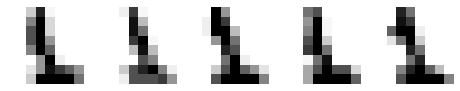

Cluster:10


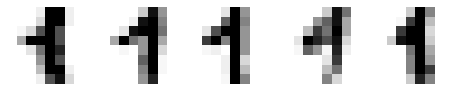

In [ ]:
for i in range(10):

  idx = np.where(predict ==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster:{}'.format(i+1))

  for image in choice_image:
    plt.subplot(1,5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k+=1

  plt.show()    

### Hierarchical Clustering

In [ ]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=10, linkage='ward')
hierarchical.fit(digits.data)
predict = hierarchical.labels_

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

Cluster:1


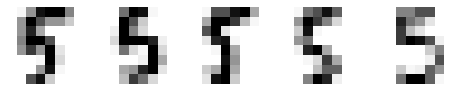

Cluster:2


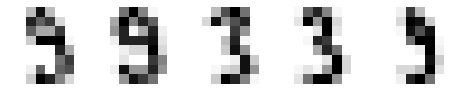

Cluster:3


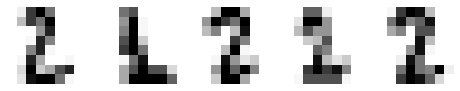

Cluster:4


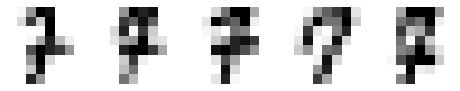

Cluster:5


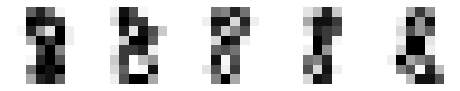

Cluster:6


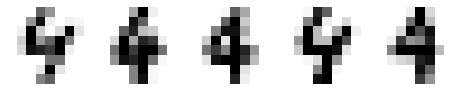

Cluster:7


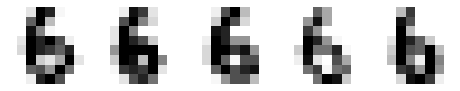

Cluster:8


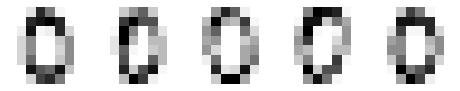

Cluster:9


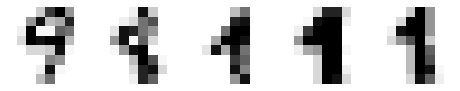

Cluster:10


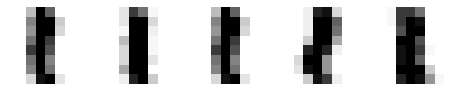

In [ ]:
for i in range(10):

  idx = np.where(predict ==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster:{}'.format(i+1))

  for image in choice_image:
    plt.subplot(1,5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k+=1

  plt.show()    

### Birch

In [ ]:
birch = cluster.Birch(n_clusters=10, threshold=.3)
birch.fit(digits.data)
predict = birch.labels_

array([7, 9, 4, ..., 4, 1, 4])

In [ ]:
for i in range(10):
  idx = np.where(predict==i)
  real_class = digits.target[idx]
  print('Cluster {}:{}'.format(i+1, real_class))

Cluster 1:[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5]
Cluster 2:[3 5 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 3 9 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 3 9 9 3 3 3 9 3 3 9 9 9 3 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9
 9 5 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 3 3 3 3 3 9 9 3
 3 3 9 3 3 9 9 9 9 3 3 3 3 3 3 3 3 3 3 3 3 3 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9
 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9
 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 3 3 9 3 3 9 9 8 9 9 3 9 3 9 3 9 9 9 9 3 3 3
 3 9 9 3 3 3 9 3 3 9 9 9 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9
 9 3 9 3 9 3 9 9 9 9 3 3 3 3 3 9 9 3 3 3 9 3 3 9 9 9 9 3 3 3 9 3 3 3 3 3 9
 9 3 9 9 3 9

Cluster:1


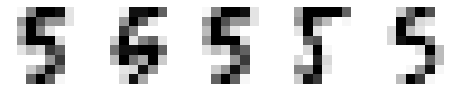

Cluster:2


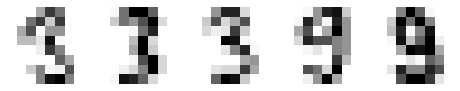

Cluster:3


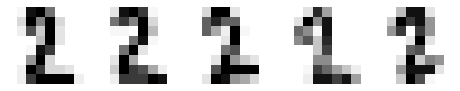

Cluster:4


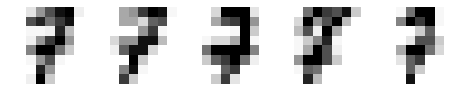

Cluster:5


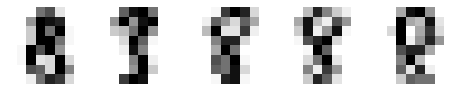

Cluster:6


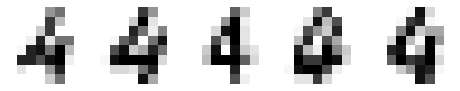

Cluster:7


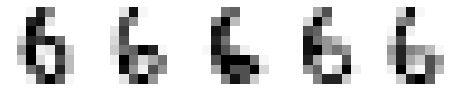

Cluster:8


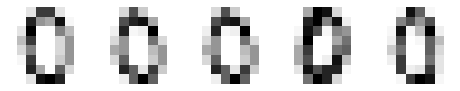

Cluster:9


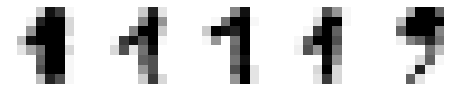

Cluster:10


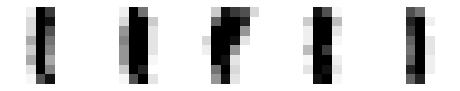

In [ ]:
for i in range(10):

  idx = np.where(predict ==i)[0]
  choice_idx = np.random.choice(idx, size=5)
  choice_image = X[choice_idx]

  k = 1

  print('Cluster:{}'.format(i+1))

  for image in choice_image:
    plt.subplot(1,5, k)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    k+=1

  plt.show()  

### silhouette_score(실루엣점수)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

X, y = datasets.make_circles(n_samples=n_samples, noise=noise, random_state=random_state, factor=0.05)

for k in k_range:

  kmeans = cluster.KMeans(n_clusters=k, random_state=200)
  kmeans.fit(X)
  clusters = kmeans.predict(X)

  score = silhouette_score(X, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

k : 2 score : 0.45390776380046804
k : 3 score : 0.5083939641396203
k : 4 score : 0.6077882185997555
k : 5 score : 0.6648979832686122
k : 6 score : 0.6853250126685059
k : 7 score : 0.6899535949341677
k : 8 score : 0.6923079548650555
k : 9 score : 0.6907222728819233
k : 10 score : 0.6904626635224165
k : 11 score : 0.6861813503282664
k : 12 score : 0.6872505139190225
k : 13 score : 0.6850610805544317
best n : 8 best score : 0.6923079548650555


k : 2 score : 0.45390776380046804
k : 3 score : 0.5083939641396203
k : 4 score : 0.6077882185997555
k : 5 score : 0.6648979832686122
k : 6 score : 0.6853250126685059
k : 7 score : 0.6899535949341677
k : 8 score : 0.6923079548650555
k : 9 score : 0.6907222728819233
k : 10 score : 0.6904626635224165
k : 11 score : 0.6861813503282664
k : 12 score : 0.6872505139190225
k : 13 score : 0.6850610805544317
best n : 8 best score : 0.6923079548650555


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


labels_


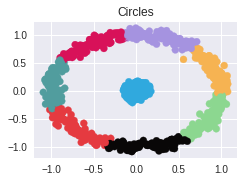

In [ ]:
#k-means Silhouette

from sklearn.metrics import silhouette_score
k_range = range(2,14)

best_n = -1
best_silhouette_score = -1

X, y = datasets.make_circles(n_samples=n_samples, noise=noise, random_state=random_state, factor=0.05)


for k in k_range:

  kmeans = KMeans(n_clusters=k, random_state=200)
  kmeans.fit(X)
  clusters = kmeans.predict(X)

  score = silhouette_score(X, clusters)
  print('k :',  k, 'score :', score)

  if score > best_silhouette_score:
    best_n = k
    best_silhouette_score = score

print('best n :', best_n, 'best score :', best_silhouette_score )

fit_predict_plot(cluster.KMeans(n_clusters=best_n, random_state=random_state), circles, 221, 'Circles')

In [ ]:
#Hierarchical Clustering(계층군집) 계층군집의 경우 거리 방법에 따라서 구해보고 결정을 해볼 수 있다.
# single을 이용한 경우
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

k_range = range(2,14)
for k in k_range:
  single_clustering = AgglomerativeClustering(n_clusters = k, linkage = 'single')
  single_cluster = single_clustering.fit_predict(X)
  score = silhouette_score(X, single_cluster)
  print(score)
  

0.3376416803698882
0.25948426853706064
0.24487700752219127
0.17792826792005167
0.16064514177523653
0.11702816171617508
0.1091717134650082
0.06804296332616643
0.06044661198606029
0.054026037937358995
0.05043137735798261
0.05224602771268257


# 군집 평가(Cluster Evaluation)

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_


# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape' , score_samples.shape)

# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터셋 Silhouette Analysis Score:{}'.format(average_score))

irisDF.head(10)

silhouette_samples{} return 값의 shape (150,)
붓꽃 데이터셋 Silhouette Analysis Score:0.5528190123564095


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852955
1,4.9,3.0,1.4,0.2,0,1,0.815495
2,4.7,3.2,1.3,0.2,0,1,0.829315
3,4.6,3.1,1.5,0.2,0,1,0.805014
4,5.0,3.6,1.4,0.2,0,1,0.849302
5,5.4,3.9,1.7,0.4,0,1,0.748280
6,4.6,3.4,1.4,0.3,0,1,0.821651
7,5.0,3.4,1.5,0.2,0,1,0.853905
8,4.4,2.9,1.4,0.2,0,1,0.752150
9,4.9,3.1,1.5,0.1,0,1,0.825294


In [ ]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' + 'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            #그래프 영역 채우기
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,  facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

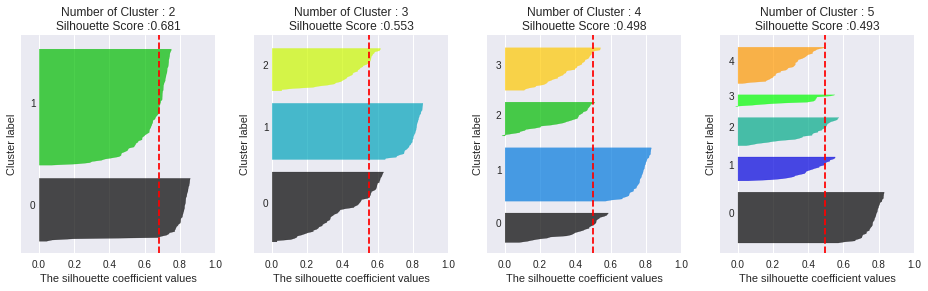

In [ ]:
import numpy as np
# make_blobs 을 통해 clustering 을 위한 4개의 클러스터 중심의 500개 2차원 데이터 셋 생성  
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], iris.data)